<a href="https://colab.research.google.com/github/isaiasgj0002/ejerciciosIA/blob/main/Algoritmos%20Python/tareas/AprendizajeNoSupervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [ ]:
dataframe = pd.DataFrame([('juanperez02', '180','160','99','2'),
                   ('josepertez81', '70','90','89','4'),
                   ('mariajula81', '100','82','41','4'),
                   ('liligs81', '80','40','102','2'),
                   ('augu91', '71','46','90','4')],
           columns=('usuario', 'cp','cc','cs','categoria')
                 )
dataframe.head()
dataframe.describe()
print(dataframe.groupby('categoria').size())

categoria
2    2
4    3
dtype: int64


In [ ]:
dataframe['cp']=dataframe['cp'].astype(float)
dataframe['cc']=dataframe['cc'].astype(float)
dataframe['cs']=dataframe['cs'].astype(float)
dataframe['categoria']=dataframe['categoria'].astype(float)

<ipython-input-6-20defdcd68fe>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dataframe.drop(['categoria'],1).hist()


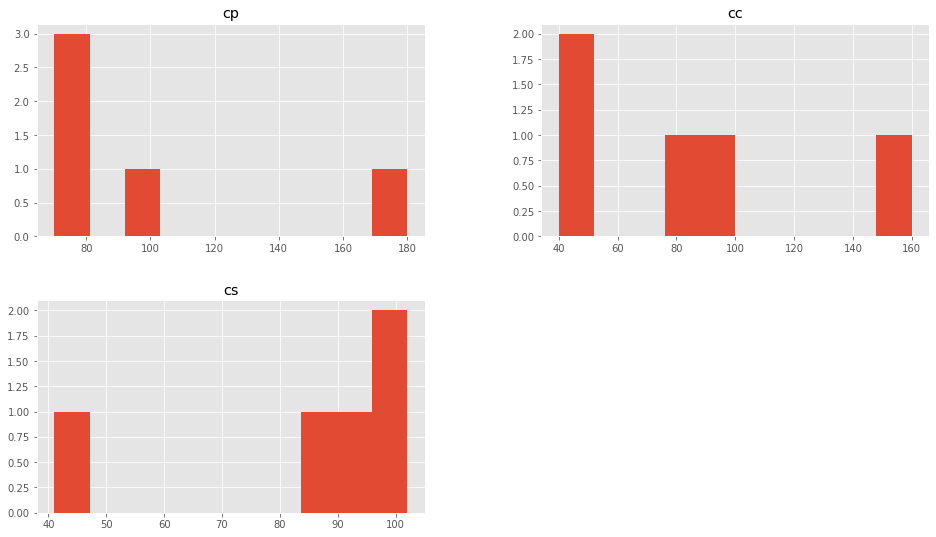

In [ ]:
dataframe.drop(['categoria'],1).hist()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


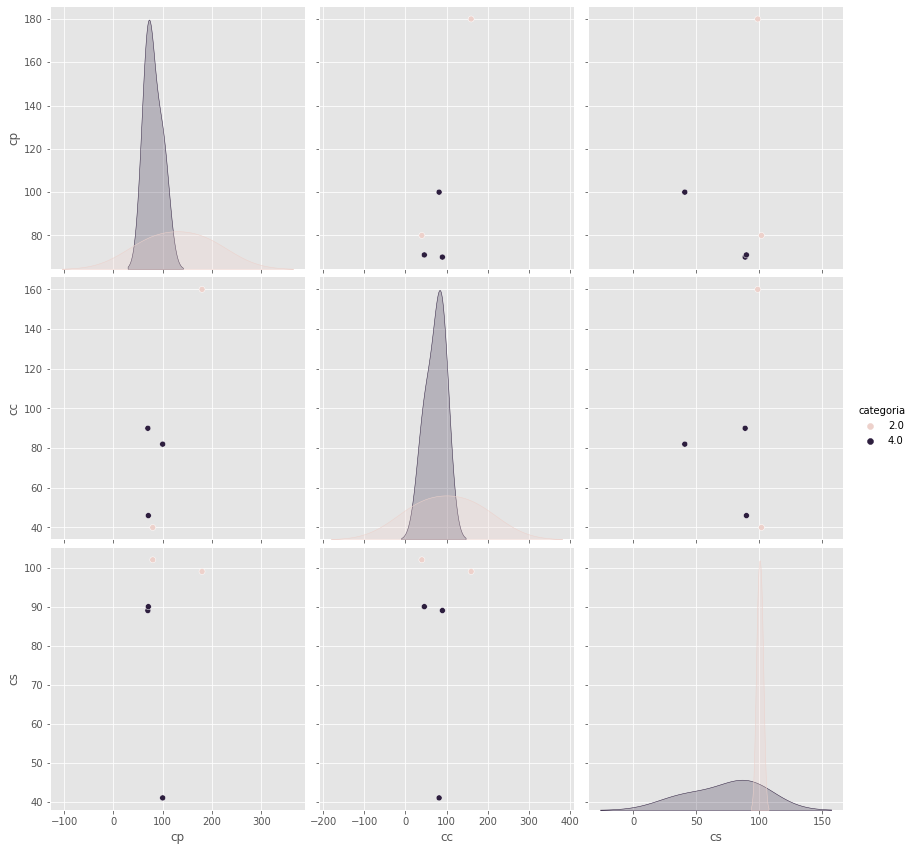

In [ ]:
sb.pairplot(dataframe.dropna(), hue='categoria',size=4,vars=["cp","cc","cs"],kind='scatter')
plt.show()

In [ ]:
X = np.array(dataframe[["cp","cc","cs"]])
y = np.array(dataframe['categoria'])
X.shape

(5, 3)

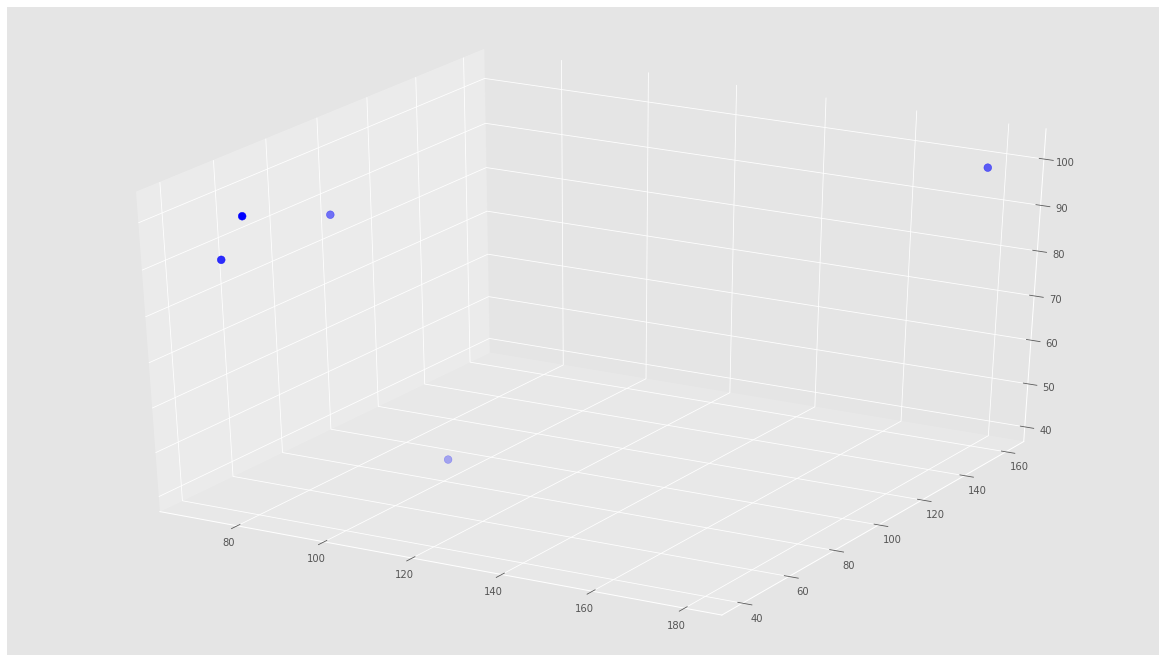

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='blue',s=60)

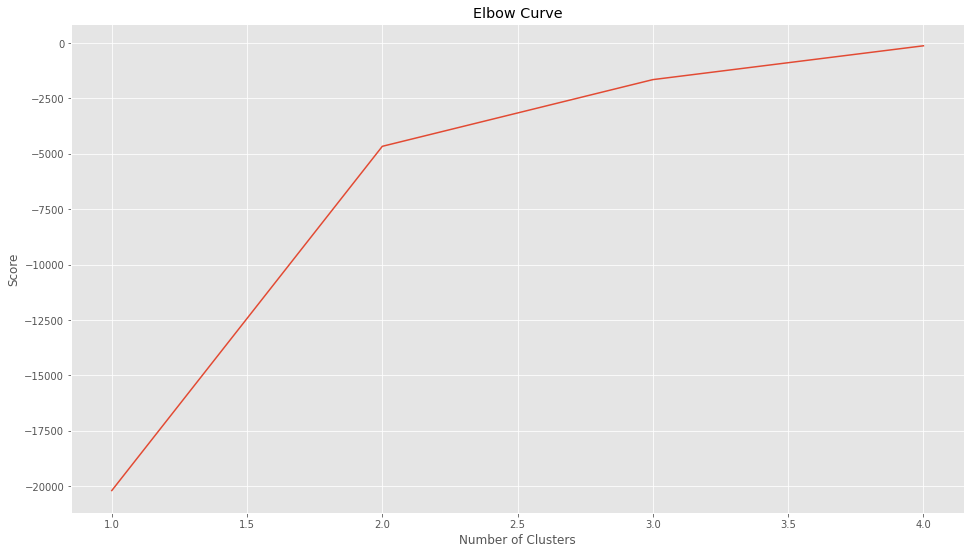

In [ ]:
Nc = range(1, 5)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 70.  90.  89.]
 [180. 160.  99.]
 [ 71.  46.  90.]
 [100.  82.  41.]
 [ 80.  40. 102.]]


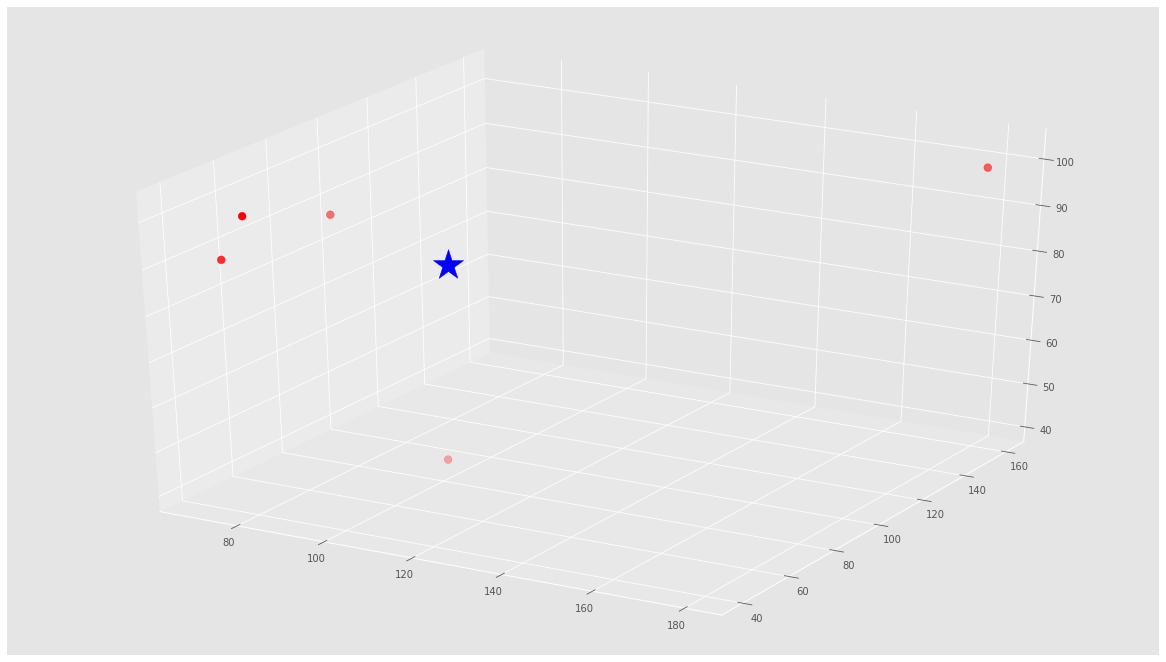

In [ ]:
labels = kmeans[0].predict(X)
C = kmeans[0].cluster_centers_
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='red',s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='blue', s=1000)

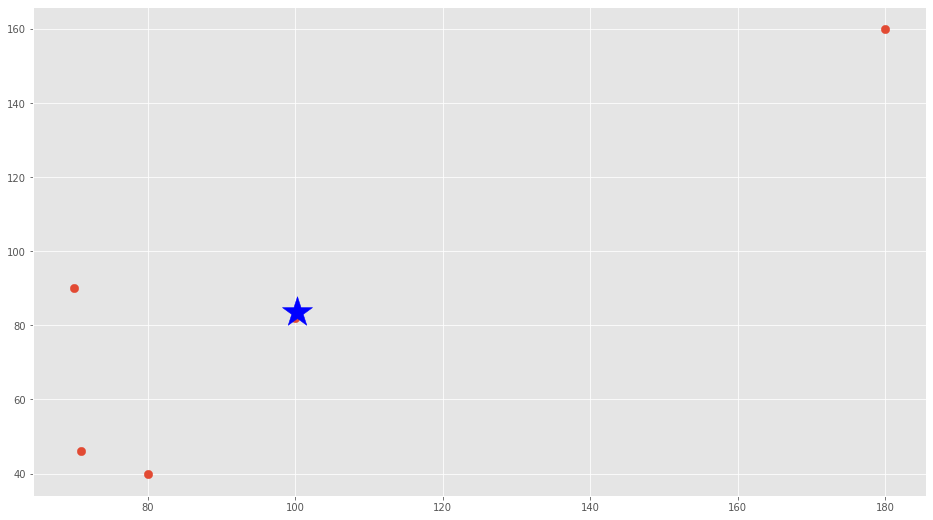

In [ ]:
f1 = dataframe['cp'].values
f2 = dataframe['cc'].values
C = kmeans[0].cluster_centers_
plt.scatter(f1, f2, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*',c='blue', s=1000)
plt.show()

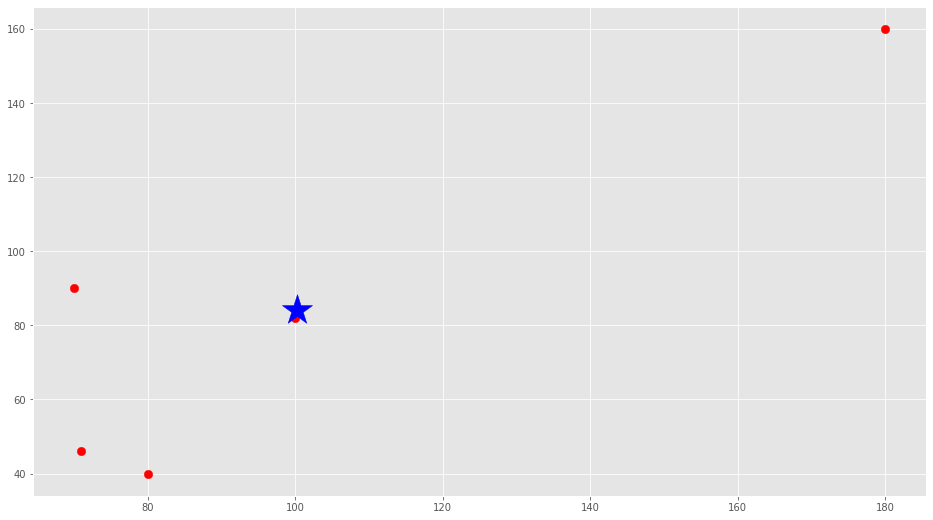

In [ ]:
f1 = dataframe['cp'].values
f2 = dataframe['cc'].values
plt.scatter(f1, f2, c='red', s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c='blue', s=1000)
plt.show()

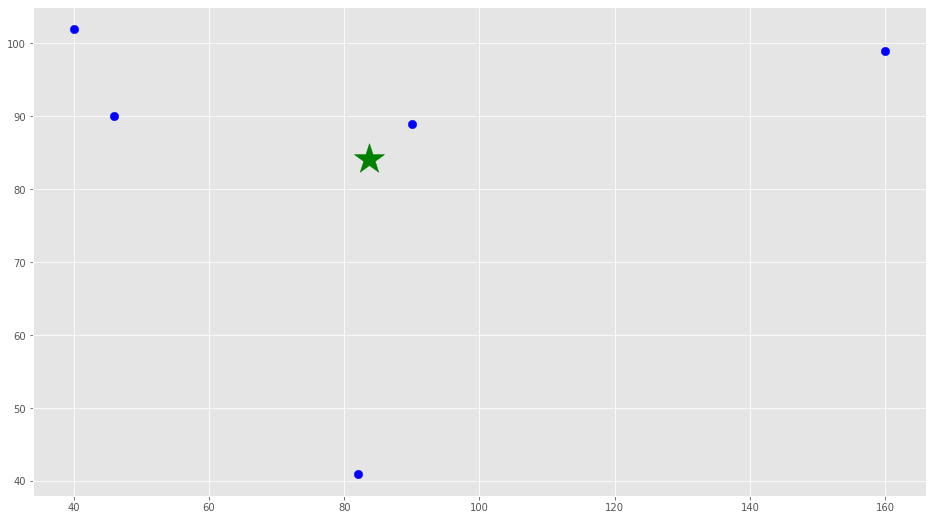

In [ ]:
f1 = dataframe['cc'].values
f2 = dataframe['cs'].values
plt.scatter(f1, f2, c='blue', s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c='green', s=1000)
plt.show()

In [ ]:
copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,cantidad
label,
0,5


In [ ]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,NaN
2,2,2.0
3,3,NaN
4,4,3.0
5,5,NaN
6,6,NaN
7,7,NaN
8,8,NaN
9,9,NaN


In [ ]:
closest, _ = pairwise_distances_argmin_min(kmeans[0].cluster_centers_, X)
closest

array([1])

In [ ]:
users=dataframe['usuario'].values
for row in closest:
    print(users[row])

josepertez81


In [ ]:
X_new = np.array([[70,61,54]])
new_labels = kmeans[0].predict(X_new)
print(new_labels)

[0]


In [ ]:
#ISAIAS GUZMÁN JORDÁN
#SENATI 4TO SEMESTRE
#ALGORITMIA PARA LA INTELIGENCIA ARTIFICIAL